# CAPSTONE PROJECT - POOJA S

### LB_DSC_24th_December_WKND

## PROBLEM STATEMENT

### The business problem tackled here is trying to improve customer service for YourCabs.com, a cab comapny in Bangalore. The Problem of interest is booking cancellations by the company due to unavailability of a car. The challenge is that cancellations can occur very close to the trip start time, thereby causing passesngers inconvenience.

## SOLUTION

### The goal of the competition is to create a predictive model for classifying new bookings as to whether they will eventually gets cancelled due to car unavailability

### Import the libraries

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

### Import the data

In [93]:
data = pd.read_csv('YourCabs.csv')
data

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,185937,14364,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,185938,48727,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43428,185939,48729,12,1.0,3,974.0,NaN,15.0,NaN,11/24/2013 18:30,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN,0
43429,185940,30724,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


In [94]:
data.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000


In [95]:
# Check the shape of the dataset
data.shape 

(43431, 18)

In [96]:
# Check the datatype of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [97]:
# Convert 'booking_created' and 'from_date' columns to datetime as they are 'Object' datatype
data['booking_created'] = pd.to_datetime(data['booking_created'], errors='coerce', infer_datetime_format = True)
data['from_date'] = pd.to_datetime(data['from_date'], errors='coerce', infer_datetime_format = True)

# Calculate the time difference in hours between 'booking_created' and 'from_date'
data['time_diff_hours'] = (data['from_date'] - data['booking_created']).dt.total_seconds() / 3600

# Convert the dates into uniform format (dd-mm-yy hh:mm) as the dates are in two different formats
data['booking_created'] = data['booking_created'].dt.strftime('%d-%m-%Y %H:%M')
data['from_date'] = data['from_date'].dt.strftime('%d-%m-%Y %H:%M')

# Drop the original date columns and keep the important column
data = data.drop(columns=['booking_created', 'from_date'])

C:\Users\POOJA S\AppData\Local\Temp\ipykernel_11952\919848453.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['booking_created'] = pd.to_datetime(data['booking_created'], errors='coerce', infer_datetime_format = True)
C:\Users\POOJA S\AppData\Local\Temp\ipykernel_11952\919848453.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['from_date'] = pd.to_datetime(data['from_date'], errors='coerce', infer_datetime_format = True)


In [98]:
data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,time_diff_hours
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,0,0,12.924150,77.672290,12.927320,77.635750,0,0.350000
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,0,0,12.966910,77.749350,12.927680,77.626640,0,6.583333
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,0,0,12.937222,77.626915,13.047926,77.597766,0,0.366667
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,0,0,12.989990,77.553320,12.971430,77.639140,0,1.100000
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,0,0,12.845653,77.677925,12.954340,77.600720,0,1.116667


In [99]:
data.shape

(43431, 17)

In [100]:
# Check for null/missing values
data.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
online_booking             0
mobile_site_booking        0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
time_diff_hours        27645
dtype: int64

In [101]:
# Initialize the imputers
mean_imputer = SimpleImputer(strategy ='mean')  # For numerical data
mode_imputer = SimpleImputer(strategy ='most_frequent')  # For categorical data

# List of columns for different strategies
numerical_cols = ['from_lat', 'from_long', 'to_lat', 'to_long']
categorical_cols = ['package_id', 'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id']

# Apply mean imputation for numerical columns
data[numerical_cols] = mean_imputer.fit_transform(data[numerical_cols])

# Apply mode imputation for categorical columns
data[categorical_cols] = mode_imputer.fit_transform(data[categorical_cols])

# Imputing missing numerical values with the mean
data['time_diff_hours'] = data['time_diff_hours'].fillna(data['time_diff_hours'].mean())

In [102]:
data

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,time_diff_hours
0,132512,22177,28,1.0,2,83.0,448.0,15.0,32.0,0,0,12.924150,77.672290,12.927320,77.635750,0,0.350000
1,132513,21413,12,1.0,2,1010.0,540.0,15.0,32.0,0,0,12.966910,77.749350,12.927680,77.626640,0,6.583333
2,132514,22178,12,1.0,2,1301.0,1034.0,15.0,32.0,0,0,12.937222,77.626915,13.047926,77.597766,0,0.366667
3,132515,13034,12,1.0,2,768.0,398.0,15.0,32.0,0,0,12.989990,77.553320,12.971430,77.639140,0,1.100000
4,132517,22180,12,1.0,2,1365.0,849.0,15.0,32.0,0,0,12.845653,77.677925,12.954340,77.600720,0,1.116667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,185937,14364,12,1.0,2,1147.0,452.0,15.0,32.0,1,0,13.030640,77.649100,12.952780,77.590880,0,16.335315
43427,185938,48727,12,1.0,2,393.0,466.0,15.0,32.0,1,0,13.199560,77.706880,13.017436,77.644580,0,16.335315
43428,185939,48729,12,1.0,3,974.0,393.0,15.0,32.0,0,0,13.075570,77.559040,13.026648,77.640595,0,16.335315
43429,185940,30724,87,1.0,2,1263.0,542.0,15.0,32.0,0,0,12.968970,77.594560,12.938230,77.622890,0,16.335315


In [103]:
data.isnull().sum()

id                     0
user_id                0
vehicle_model_id       0
package_id             0
travel_type_id         0
from_area_id           0
to_area_id             0
from_city_id           0
to_city_id             0
online_booking         0
mobile_site_booking    0
from_lat               0
from_long              0
to_lat                 0
to_long                0
Car_Cancellation       0
time_diff_hours        0
dtype: int64

In [104]:
data.Car_Cancellation.value_counts()

Car_Cancellation
0    40299
1     3132
Name: count, dtype: int64

#### Observation - a very few cancellations when compared to large amount of non-cancellations.

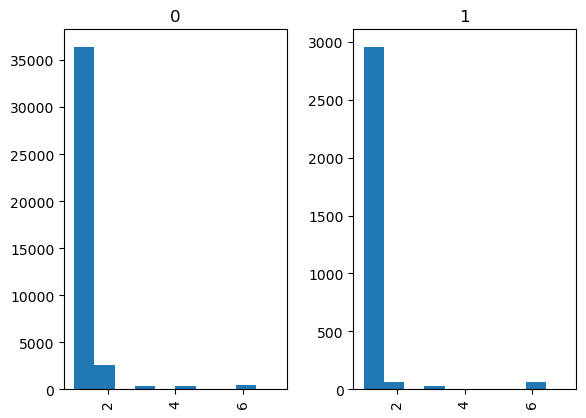

In [105]:
data.hist(column='package_id', by='Car_Cancellation');

#### Observation: most of the times 1st package (4hrs & 40kms) has got cancelled followed by packages (3hrs & 30kms) and (8hrs & 80kms)

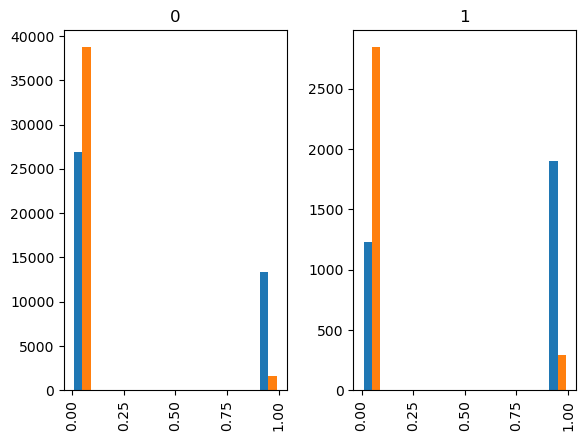

In [106]:
data.hist(column=['online_booking','mobile_site_booking'], by='Car_Cancellation');

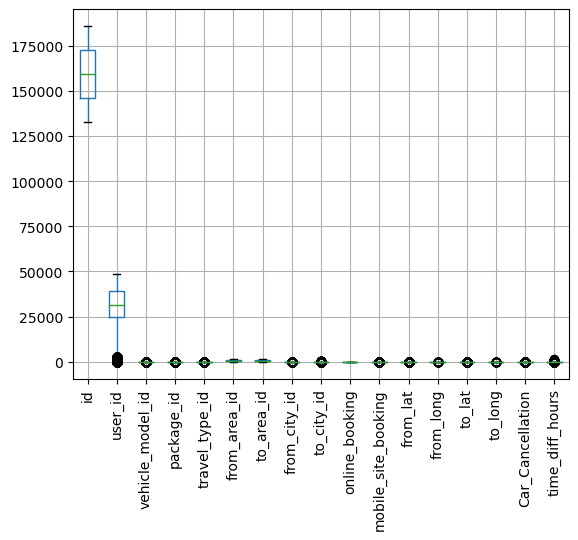

In [107]:
# Checking for Outliers

data.boxplot()
plt.xticks(rotation = 90)
plt.show()

#### Observation: There don't seem to be any outliers

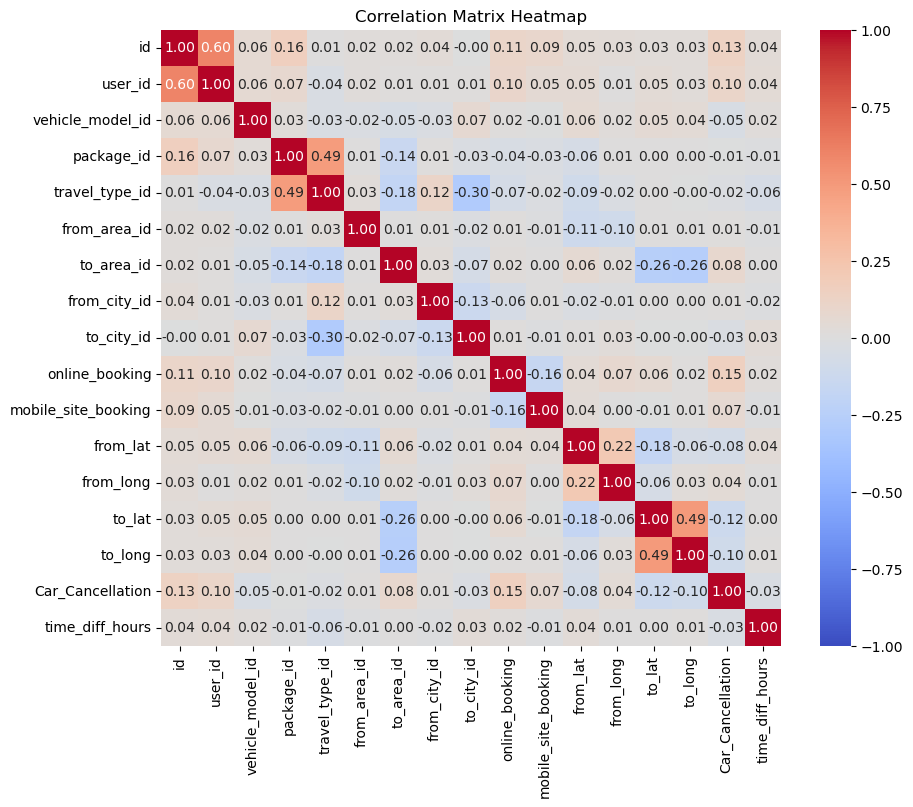

In [108]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Observation: id, user_id, from_lat, from_long, to_lat, to_long, package_id, travel_type_id have high positive correlation

In [109]:
pd.pivot_table(data[['online_booking', 'mobile_site_booking', 'Car_Cancellation']], values='Car_Cancellation', index=['online_booking', 'mobile_site_booking'], aggfunc= np.count_nonzero)

Car_Cancellation
online_booking mobile_site_booking                  
0              0                                 940
               1                                 289
1              0                                1903

#### Observation: Call center - 940 cancelled, mobile site booking - 289 cancelled. So most of the cancellations (1903) are those that were booked online.

### Data Filtering

#### Based on the travel_type_id 1 = Long distance, 2 = Point to Point and 3 = Hourly Rental, we are creating separate models

In [110]:
cabs = data.copy()

In [111]:
# Splitting the data by 'travel_type_id' into 3 separate datasets
model1 = cabs[cabs['travel_type_id'] == 1].copy()
model2 = cabs[cabs['travel_type_id'] == 2].copy()
model3 = cabs[cabs['travel_type_id'] == 3].copy()

In [112]:
# Creating the list of columns to be dropped from the datasets created above based on the travel_type_id 
cols_drop_m1 = ['id','user_id','vehicle_model_id','package_id','travel_type_id','to_area_id','from_lat','from_long','to_lat','to_long']
cols_drop_m2 = ['id','user_id','vehicle_model_id','package_id','travel_type_id','from_city_id','to_city_id']
cols_drop_m3 = ['id','user_id','vehicle_model_id','travel_type_id','to_area_id','from_city_id','to_city_id','from_lat','from_long','to_lat','to_long']

In [113]:
# Dropping the columns 
model1 = model1.drop(columns=cols_drop_m1)
model2 = model2.drop(columns=cols_drop_m2)
model3 = model3.drop(columns=cols_drop_m3)

In [114]:
# Re-checking the shape of the datasets after dropping the unimportant columns
print(model1.shape,model2.shape,model3.shape)

(1589, 7) (34292, 10) (7550, 6)


###  Transformations

### Model 1

In [115]:
model1

,from_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation,time_diff_hours
6,571.0,15.0,108.0,0,0,0,0.400000
17,1383.0,15.0,32.0,1,0,0,259.716667
24,515.0,15.0,32.0,0,0,0,89.833333
158,136.0,1.0,152.0,1,0,0,21.183333
216,1118.0,15.0,32.0,1,0,0,45.966667
...,...,...,...,...,...,...,...
43342,393.0,15.0,191.0,1,0,0,16.335315
43385,119.0,15.0,146.0,1,0,0,16.335315
43386,1281.0,15.0,32.0,1,0,0,16.335315
43393,393.0,15.0,116.0,0,0,0,16.335315


In [116]:
# Create a new column 'route' combining 'from_city_id' and 'to_city_id'
route = model1.groupby(['from_city_id','to_city_id','from_area_id'])

# Calculating cancellation percentage for each group
cancellation_per1 = route['Car_Cancellation'].mean() * 100

# Resetting index to convert Series to DataFrame
cancellation_per1 = cancellation_per1.reset_index()

# Renaming columns appropriately
cancellation_per1.columns = ['from_city_id','to_city_id','from_area_id','cancellation_per1']

# Merge back to the original DataFrame
model1 = model1.merge(cancellation_per1, on=['from_city_id','to_city_id','from_area_id'], how='left')

# Drop unnecessary columns if needed
model1 = model1.drop(columns=['from_city_id', 'to_city_id','from_area_id'])

# Display the DataFrame
model1

,online_booking,mobile_site_booking,Car_Cancellation,time_diff_hours,cancellation_per1
0,0,0,0,0.400000,0.0
1,1,0,0,259.716667,0.0
2,0,0,0,89.833333,0.0
3,1,0,0,21.183333,0.0
4,1,0,0,45.966667,0.0
...,...,...,...,...,...
1584,1,0,0,16.335315,0.0
1585,1,0,0,16.335315,0.0
1586,1,0,0,16.335315,0.0
1587,0,0,0,16.335315,0.0


In [117]:
# Define a function to categorize the cancellation percentage
def categorize_cancellation_volume(percentage):
    if percentage == 0:
        return 'Zero'
    elif 0 < percentage <= 33:
        return 'Low'
    elif 33 < percentage <= 66:
        return 'Medium'
    else:
        return 'High'

In [118]:
# Apply the function to create the 'Cancellation volume' column
model1['Cancellation_volume'] = model1['cancellation_per1'].apply(categorize_cancellation_volume)

model1 = model1.drop(columns = ['cancellation_per1'])
model1

,online_booking,mobile_site_booking,Car_Cancellation,time_diff_hours,Cancellation_volume
0,0,0,0,0.400000,Zero
1,1,0,0,259.716667,Zero
2,0,0,0,89.833333,Zero
3,1,0,0,21.183333,Zero
4,1,0,0,45.966667,Zero
...,...,...,...,...,...
1584,1,0,0,16.335315,Zero
1585,1,0,0,16.335315,Zero
1586,1,0,0,16.335315,Zero
1587,0,0,0,16.335315,Zero


In [119]:
# Count the number of occurrences in each category
cancellation_volume_counts = model1['Cancellation_volume'].value_counts()
print(cancellation_volume_counts)

Cancellation_volume
Zero      1476
Low         93
Medium      11
High         9
Name: count, dtype: int64


In [120]:
# Encoding the cancellation volume using map
model1['Cancellation_Vol'] = model1['Cancellation_volume'].map({'Zero':0,'Low':1,'Medium':2,'High':3})

model1 = model1.drop(columns = 'Cancellation_volume')

model1

,online_booking,mobile_site_booking,Car_Cancellation,time_diff_hours,Cancellation_Vol
0,0,0,0,0.400000,0
1,1,0,0,259.716667,0
2,0,0,0,89.833333,0
3,1,0,0,21.183333,0
4,1,0,0,45.966667,0
...,...,...,...,...,...
1584,1,0,0,16.335315,0
1585,1,0,0,16.335315,0
1586,1,0,0,16.335315,0
1587,0,0,0,16.335315,0


### Splitting the data into training and testing data

In [121]:
# Split the data into features (x) and target (y)
x1 = model1.drop(columns = ['Car_Cancellation'])
y1 = model1['Car_Cancellation']

# Split the data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)

In [122]:
# Display the first few rows of x_train to verify
print(x1_train.head())

      online_booking  mobile_site_booking  time_diff_hours  Cancellation_Vol
1174               1                    0        16.335315                 1
701                1                    0        16.335315                 0
1520               1                    0        37.766667                 0
528                1                    0        16.335315                 0
987                0                    0        16.335315                 0


In [123]:
# Feature scaling
standard_Scaler = StandardScaler()
x1_train = standard_Scaler.fit_transform(x1_train)
x1_test = standard_Scaler.transform(x1_test)

### Logistic Regression

In [124]:
# Initialize the Logistic Regression model
logreg1 = LogisticRegression()

# Train the model on the training data
logreg1.fit(x1_train, y1_train)
y1_pred = logreg1.predict(x1_test)

y1_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [125]:
y1_test

1079    0
405     0
1492    0
239     0
610     0
       ..
1023    0
700     0
486     0
672     0
1303    0
Name: Car_Cancellation, Length: 318, dtype: int64

Accuracy: 0.9968553459119497
Confusion Matrix:
[[315   0]
 [  1   2]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       315
           1       1.00      0.67      0.80         3

    accuracy                           1.00       318
   macro avg       1.00      0.83      0.90       318
weighted avg       1.00      1.00      1.00       318



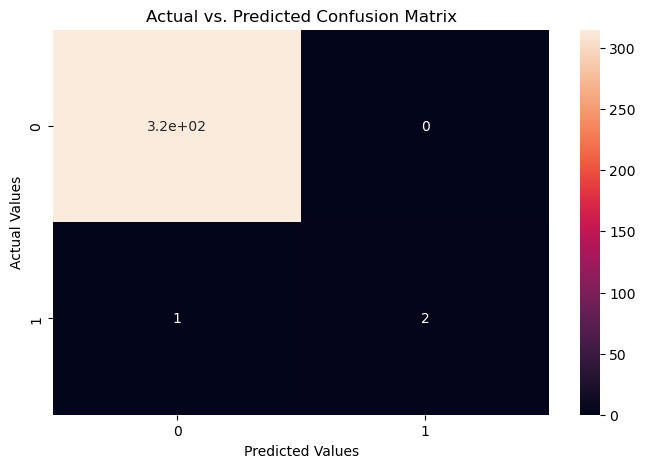

In [126]:
accuracy1 = accuracy_score(y1_test, y1_pred)
print(f'Accuracy: {accuracy1}')

conf_matrix1 = confusion_matrix(y1_test, y1_pred)
print(f'Confusion Matrix:\n{conf_matrix1}')

class_report1 = classification_report(y1_test, y1_pred)
print(f'Classification Report:\n{class_report1}')

fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_matrix1, annot = True, ax=ax)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [127]:
error1 = 1 - accuracy1
print(f'Error: {error1}')

Error: 0.0031446540880503138


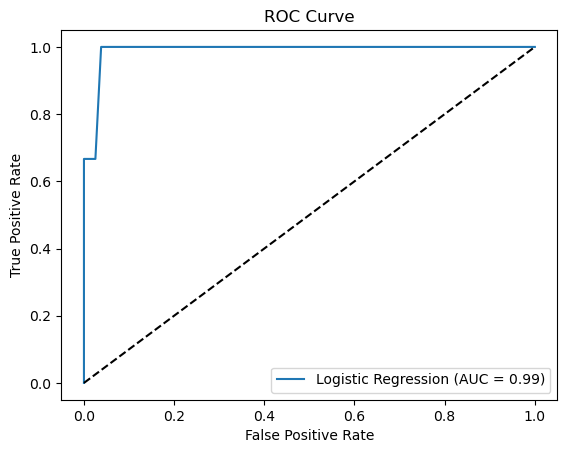

In [128]:
y1_pred_prob = logreg1.predict_proba(x1_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y1_test, y1_pred_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y1_test, y1_pred_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### RandomForest Algorithm

In [129]:
randfor1 = RandomForestClassifier()

randfor1.fit(x1_train, y1_train)
    
y1_pred = randfor1.predict(x1_test)

accuracy1 = accuracy_score(y1_test, y1_pred)

print(f"Accuracy: {accuracy1 * 100:.2f}%")

Accuracy: 99.69%


### DecisionTree

In [130]:
# Decision Tree
dt1 = DecisionTreeClassifier(random_state = 1,max_depth = 2)
dt1.fit(x1_train, y1_train)
dt1_train = dt1.score(x1_train,y1_train)
dt1_test = dt1.score(x1_test,y1_test)

#y_pred_dt = dt.predict(x_test)

print('Training Score',dt1_train)

print('Testing Score',dt1_test)

Training Score 0.991345397324941
Testing Score 0.9968553459119497


In [131]:
# Decision Tree
dt1 = DecisionTreeClassifier(random_state = 1,max_depth = 4)
dt1.fit(x1_train, y1_train)
dt1_train = dt1.score(x1_train,y1_train)
dt1_test = dt1.score(x1_test,y1_test)

#y_pred_dt = dt.predict(x_test)

print('Training Score',dt1_train)

print('Testing Score',dt1_test)

Training Score 0.991345397324941
Testing Score 0.9968553459119497


In [132]:
# Decision Tree - overfitting
dt1 = DecisionTreeClassifier(random_state = 1,max_depth = 6)
dt1.fit(x1_train, y1_train)
dt1_train = dt1.score(x1_train,y1_train)
dt1_test = dt1.score(x1_test,y1_test)

#y_pred_dt = dt.predict(x_test)

print('Training Score',dt1_train)

print('Testing Score',dt1_test)


Training Score 0.99213217938631
Testing Score 0.9968553459119497


#### Observation: Based on these results, max_depth = 6 appears to be a good compromise for achieving high performance on both training and testing data.


In [133]:
# Decision Tree using Entropy

ent1 = DecisionTreeClassifier(max_depth = 6,criterion ='entropy')

ent1.fit(x1_train,y1_train)

ent1_train = ent1.score(x1_train,y1_train)
print(f'Training score: {ent1_train}')

ent1_test = ent1.score(x1_test,y1_test)
print(f'Testing score: {ent1_test}')

Training score: 0.991345397324941
Testing score: 0.9968553459119497


### Naive Bayes Classifier

In [134]:
from sklearn.naive_bayes import GaussianNB
mod1 = GaussianNB()

# Train the model
mod1.fit(x1_train, y1_train)

# Predict the results
pred1 = mod1.predict(x1_test)
mat1 = confusion_matrix(y1_test, pred1)
names = np.unique(pred1)
print(mat1)

class_report1 = classification_report(y1_test, pred1)
print(f'Classification Report:\n{class_report1}')

[[193 122]
 [  1   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.61      0.76       315
           1       0.02      0.67      0.03         3

    accuracy                           0.61       318
   macro avg       0.51      0.64      0.39       318
weighted avg       0.99      0.61      0.75       318



### KNN Algorithm

In [135]:
knn1 = KNeighborsClassifier(n_neighbors = 3)

knn1.fit(x1_train,y1_train)

pred1 = knn1.predict(x1_test)

print(confusion_matrix(y1_test,pred1))

print(classification_report(y1_test,pred1))

[[315   0]
 [  1   2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       315
           1       1.00      0.67      0.80         3

    accuracy                           1.00       318
   macro avg       1.00      0.83      0.90       318
weighted avg       1.00      1.00      1.00       318



In [136]:
param_grid = {
    'n_neighbors': range(1, 31),  # testing k values from 1 to 30
    'weights': ['uniform', 'distance'],  # testing different weighting methods
    'metric': ['euclidean', 'manhattan', 'minkowski']  # testing different distance metrics
}

# Set up GridSearchCV
grid_search = GridSearchCV(knn1, param_grid, cv = 5, scoring ='accuracy')

# Fit the model on the data 
grid_search.fit(x1_train, y1_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Use the best estimator to make predictions
best_knn = grid_search.best_estimator_
y1_pred = best_knn.predict(x1_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y1_test, y1_pred))

# Cross-validation with the best model
cross_val_scores = cross_val_score(best_knn, x1_train, y1_train, cv = 5, scoring = 'accuracy')
print("\nCross-validation scores: ", cross_val_scores)
print("Mean cross-validation accuracy: ", cross_val_scores.mean())

Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
Confusion Matrix:
[[315   0]
 [  1   2]]

Cross-validation scores:  [0.98823529 0.99606299 0.99212598 0.99212598 0.98818898]
Mean cross-validation accuracy:  0.9913478462251042


### Gradiant Booster - XgBoost

In [137]:
gbm1 = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gbm1.fit(x1_train, y1_train)

# Make predictions
y1_pred = gbm1.predict(x1_test)

# Evaluate the model
accuracy1 = accuracy_score(y1_test, y1_pred)
conf_matrix1 = confusion_matrix(y1_test, y1_pred)
class_report1 = classification_report(y1_test, y1_pred)
roc_auc1 = roc_auc_score(y1_test, gbm1.predict_proba(x1_test)[:, 1])

# Print the evaluation metrics
print(f'Accuracy: {accuracy1:.4f}')
print('Confusion Matrix:')
print(conf_matrix1)
print('Classification Report:')
print(class_report1)
print(f'ROC AUC: {roc_auc1:.4f}')

Accuracy: 0.9969
Confusion Matrix:
[[315   0]
 [  1   2]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       315
           1       1.00      0.67      0.80         3

    accuracy                           1.00       318
   macro avg       1.00      0.83      0.90       318
weighted avg       1.00      1.00      1.00       318

ROC AUC: 0.9894


#### Observation:
 - Logistic Regression (Accuracy: 99.69%, ROC-AUC Curve: 0.99)
 - Random Forest (Accuracy: 99.69%)
 - KNN (Accuracy: 99.13%, after cross-validation and hyperparameter tuning)

#### These three models have similar performance, with Logistic Regression and Random Forest being almost identical. Naive Bayes provides poor result when compared, likely due to its simplicity and inability to capture complex relationships in the data.
#### Decision Tree (max_depth = 6) has similar performance to Random Forest, but its entropy scores are slightly lower.
#### It effectively classifies both non-cancellation (class 0) and cancellation (class 1) events. The high performance of logistic regression and KNN in this model further supports its choice as the best model for predicting car cancellations.
#### Using Gradient boosting algorithm accuracy of 99% and ROC_AUC curve of 0.98 is obtained.

### Model 2

### Transformation

In [138]:
model2

,from_area_id,to_area_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,time_diff_hours
0,83.0,448.0,0,0,12.924150,77.672290,12.927320,77.635750,0,0.350000
1,1010.0,540.0,0,0,12.966910,77.749350,12.927680,77.626640,0,6.583333
2,1301.0,1034.0,0,0,12.937222,77.626915,13.047926,77.597766,0,0.366667
3,768.0,398.0,0,0,12.989990,77.553320,12.971430,77.639140,0,1.100000
4,1365.0,849.0,0,0,12.845653,77.677925,12.954340,77.600720,0,1.116667
...,...,...,...,...,...,...,...,...,...,...
43425,585.0,1226.0,0,1,12.976770,77.572700,13.015080,77.677960,0,16.335315
43426,1147.0,452.0,1,0,13.030640,77.649100,12.952780,77.590880,0,16.335315
43427,393.0,466.0,1,0,13.199560,77.706880,13.017436,77.644580,0,16.335315
43429,1263.0,542.0,0,0,12.968970,77.594560,12.938230,77.622890,0,16.335315


In [139]:
# Finding the route by combining from_area_id and to_area_id
route = model2.groupby(['from_area_id', 'to_area_id'])

# Calculate cancellation percentage for each group
cancellation_per2 = route['Car_Cancellation'].mean() * 100

# Reset index to convert Series to DataFrame
cancellation_per2 = cancellation_per2.reset_index()
cancellation_per2.columns = ['from_area_id', 'to_area_id', 'cancellation_per2']

model2 = model2.merge(cancellation_per2, on = ['from_area_id', 'to_area_id'], how ='left')

model2 = model2.drop(columns=['from_area_id','to_area_id'])
model2

,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,time_diff_hours,cancellation_per2
0,0,0,12.924150,77.672290,12.927320,77.635750,0,0.350000,0.0
1,0,0,12.966910,77.749350,12.927680,77.626640,0,6.583333,0.0
2,0,0,12.937222,77.626915,13.047926,77.597766,0,0.366667,0.0
3,0,0,12.989990,77.553320,12.971430,77.639140,0,1.100000,0.0
4,0,0,12.845653,77.677925,12.954340,77.600720,0,1.116667,0.0
...,...,...,...,...,...,...,...,...,...
34287,0,1,12.976770,77.572700,13.015080,77.677960,0,16.335315,0.0
34288,1,0,13.030640,77.649100,12.952780,77.590880,0,16.335315,0.0
34289,1,0,13.199560,77.706880,13.017436,77.644580,0,16.335315,0.0
34290,0,0,12.968970,77.594560,12.938230,77.622890,0,16.335315,0.0


In [140]:
# Apply the function to create the 'Cancellation volume' column
model2['Cancellation_volume'] = model2['cancellation_per2'].apply(categorize_cancellation_volume)

model2 = model2.drop(columns = ['cancellation_per2'])
model2

,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,time_diff_hours,Cancellation_volume
0,0,0,12.924150,77.672290,12.927320,77.635750,0,0.350000,Zero
1,0,0,12.966910,77.749350,12.927680,77.626640,0,6.583333,Zero
2,0,0,12.937222,77.626915,13.047926,77.597766,0,0.366667,Zero
3,0,0,12.989990,77.553320,12.971430,77.639140,0,1.100000,Zero
4,0,0,12.845653,77.677925,12.954340,77.600720,0,1.116667,Zero
...,...,...,...,...,...,...,...,...,...
34287,0,1,12.976770,77.572700,13.015080,77.677960,0,16.335315,Zero
34288,1,0,13.030640,77.649100,12.952780,77.590880,0,16.335315,Zero
34289,1,0,13.199560,77.706880,13.017436,77.644580,0,16.335315,Zero
34290,0,0,12.968970,77.594560,12.938230,77.622890,0,16.335315,Zero


In [141]:
# Count the number of occurrences in each category
cancellation_volume_counts = model2['Cancellation_volume'].value_counts()
print(cancellation_volume_counts)

Cancellation_volume
Zero      20786
Low       10850
Medium     1359
High       1297
Name: count, dtype: int64


In [142]:
from geopy.distance import geodesic

# Define a function to calculate the distance in kilometers using from_date and booking_created
def calculate_distance(row):
    coords_1 = (row['from_lat'], row['from_long'])
    coords_2 = (row['to_lat'], row['to_long'])
    return geodesic(coords_1, coords_2).kilometers

# Apply the function to calculate distance
model2['Distance'] = model2.apply(calculate_distance, axis=1)

model2 = model2.drop(columns=['from_lat','from_long','to_lat','to_long'])
model2

,online_booking,mobile_site_booking,Car_Cancellation,time_diff_hours,Cancellation_volume,Distance
0,0,0,0,0.350000,Zero,3.980687
1,0,0,0,6.583333,Zero,14.004432
2,0,0,0,0.366667,Zero,12.648909
3,0,0,0,1.100000,Zero,9.534596
4,0,0,0,1.116667,Zero,14.655467
...,...,...,...,...,...,...
34287,0,1,0,16.335315,Zero,12.180435
34288,1,0,0,16.335315,Zero,10.681284
34289,1,0,0,16.335315,Zero,21.251031
34290,0,0,0,16.335315,Zero,4.584142


In [143]:
# Encoding the cancellation volume using map
model2['Cancellation_Vol'] = model2['Cancellation_volume'].map({'Zero':0,'Low':1,'Medium':2,'High':3})

model2 = model2.drop(columns = 'Cancellation_volume')

model2

,online_booking,mobile_site_booking,Car_Cancellation,time_diff_hours,Distance,Cancellation_Vol
0,0,0,0,0.350000,3.980687,0
1,0,0,0,6.583333,14.004432,0
2,0,0,0,0.366667,12.648909,0
3,0,0,0,1.100000,9.534596,0
4,0,0,0,1.116667,14.655467,0
...,...,...,...,...,...,...
34287,0,1,0,16.335315,12.180435,0
34288,1,0,0,16.335315,10.681284,0
34289,1,0,0,16.335315,21.251031,0
34290,0,0,0,16.335315,4.584142,0


### Splitting the data into training and testing data

In [144]:
# Split the data into features (x) and target (y)
x2 = model2.drop(columns = ['Car_Cancellation'])
y2 = model2['Car_Cancellation']

# Split the data into training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

In [145]:
# Display the first few rows of x_train to verify
print(x2_train.head())

       online_booking  mobile_site_booking  time_diff_hours   Distance  \
22777               1                    0        16.335315  27.427907   
3488                0                    0        16.335315  11.212340   
25132               0                    0         0.700000  10.790940   
6011                0                    0        16.335315   5.805530   
6263                1                    0        16.335315  28.400212   

       Cancellation_Vol  
22777                 1  
3488                  0  
25132                 0  
6011                  0  
6263                  0  


In [146]:
# Feature Scaling
standard_Scaler = StandardScaler()
x2_train = standard_Scaler.fit_transform(x2_train)
x2_test = standard_Scaler.transform(x2_test)

### Logistic Regression

In [147]:
# Initialize the Logistic Regression model
logreg2 = LogisticRegression()

# Train the model on the training data
logreg2.fit(x2_train, y2_train)

y2_pred = logreg2.predict(x2_test)

y2_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [148]:
y2_test

21333    0
29026    0
21783    0
31837    0
28115    0
        ..
9480     0
16942    0
20903    0
16908    0
15826    0
Name: Car_Cancellation, Length: 6859, dtype: int64

Accuracy: 0.9566992272926083
Confusion Matrix:
[[6245   80]
 [ 217  317]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6325
           1       0.80      0.59      0.68       534

    accuracy                           0.96      6859
   macro avg       0.88      0.79      0.83      6859
weighted avg       0.95      0.96      0.95      6859



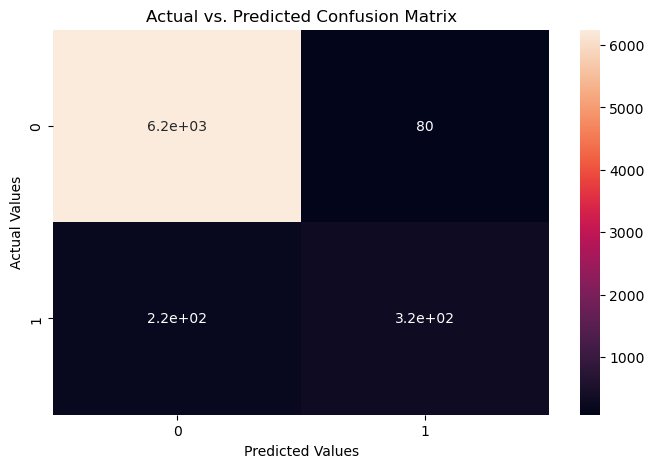

In [149]:
accuracy2 = accuracy_score(y2_test, y2_pred)
print(f'Accuracy: {accuracy2}')

conf_matrix2 = confusion_matrix(y2_test, y2_pred)
print(f'Confusion Matrix:\n{conf_matrix2}')

class_report2 = classification_report(y2_test, y2_pred)
print(f'Classification Report:\n{class_report2}')

fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_matrix2, annot = True, ax=ax)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [150]:
error2 = 1 - accuracy2
print(f'Error: {error2}')

Error: 0.043300772707391744


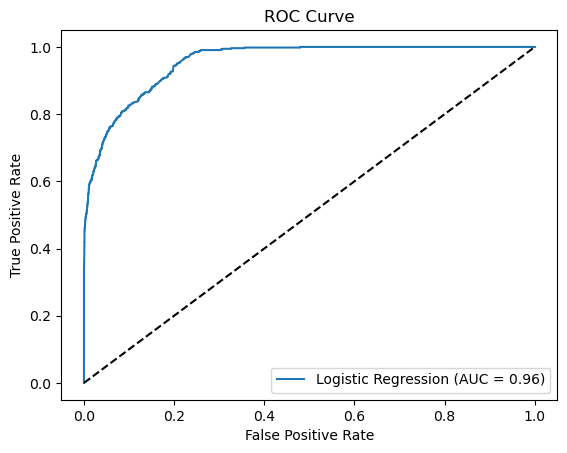

In [151]:
y2_pred_prob = logreg2.predict_proba(x2_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y2_test, y2_pred_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y2_test, y2_pred_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### RandomForest Algorithm

In [152]:
randfor2 = RandomForestClassifier()

randfor2.fit(x2_train, y2_train)
    
y_pred2 = randfor2.predict(x2_test)

accuracy2 = accuracy_score(y2_test, y2_pred)

print(f"Accuracy: {accuracy2 * 100:.2f}%")

Accuracy: 95.67%


### DecisionTree

In [153]:
# Decision Tree
dt2 = DecisionTreeClassifier(random_state = 1, max_depth = 2)
dt2.fit(x2_train, y2_train)
dt2_train = dt2.score(x2_train,y2_train)
dt2_test = dt2.score(x2_test,y2_test)

#y_pred_dt = dt.predict(x_test)

print('Training Score',dt2_train)

print('Testing Score',dt2_test)

Training Score 0.9541792731381912
Testing Score 0.956407639597609


In [154]:
# Decision Tree
dt2 = DecisionTreeClassifier(random_state = 1, max_depth = 4)
dt2.fit(x2_train, y2_train)
dt2_train = dt2.score(x2_train,y2_train)
dt2_test = dt2.score(x2_test,y2_test)

#y_pred_dt = dt.predict(x_test)

print('Training Score',dt2_train)

print('Testing Score',dt2_test)

Training Score 0.95786097036416
Testing Score 0.9566992272926083


In [155]:
# Decision Tree 
dt2 = DecisionTreeClassifier(random_state = 1, max_depth = 6)
dt2.fit(x2_train, y2_train)
dt2_train = dt2.score(x2_train,y2_train)
dt2_test = dt2.score(x2_test,y2_test)

#y_pred_dt = dt.predict(x_test)

print('Training Score',dt2_train)

print('Testing Score',dt2_test)

Training Score 0.9588451864542704
Testing Score 0.9542207318851145


In [156]:
# Decision Tree - overfitting
dt2 = DecisionTreeClassifier(random_state = 1 ,max_depth = 8)
dt2.fit(x2_train, y2_train)
dt2_train = dt2.score(x2_train,y2_train)
dt2_test = dt2.score(x2_test,y2_test)

#y_pred_dt = dt.predict(x_test)

print('Training Score',dt2_train)

print('Testing Score',dt2_test)

Training Score 0.9612875004556556
Testing Score 0.9534917626476163


#### Observation: Based on these results, max_depth = 4 appears to be a good compromise for achieving high performance on both training and testing data.


In [157]:
# Decision Tree using Entropy
ent2 = DecisionTreeClassifier(max_depth = 4, criterion ='entropy')

ent2.fit(x2_train,y2_train)

ent_train2 = ent2.score(x2_train,y2_train)
print(f'Training score: {ent_train2}')

ent_test2 = ent2.score(x2_test,y2_test)
print(f'Testing score: {ent_test2}')

Training score: 0.95786097036416
Testing score: 0.9566992272926083


### Naive Bayes Classifier

In [158]:
from sklearn.naive_bayes import GaussianNB
mod2 = GaussianNB()

# Train the model
mod2.fit(x2_train, y2_train)

# Predict the results
pred2 = mod2.predict(x2_test)
mat2 = confusion_matrix(y2_test, pred2)
names2 = np.unique(pred2)
print(mat2)

class_report2 = classification_report(y2_test, pred2)
print(f'Classification Report:\n{class_report2}')

[[5943  382]
 [ 175  359]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      6325
           1       0.48      0.67      0.56       534

    accuracy                           0.92      6859
   macro avg       0.73      0.81      0.76      6859
weighted avg       0.93      0.92      0.92      6859



### KNN Algorithm

In [159]:
knn2 = KNeighborsClassifier(n_neighbors = 3)

knn2.fit(x2_train,y2_train)

pred2 = knn2.predict(x2_test)

print(confusion_matrix(y2_test,pred2))

print(classification_report(y2_test,pred2))

[[6193  132]
 [ 237  297]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6325
           1       0.69      0.56      0.62       534

    accuracy                           0.95      6859
   macro avg       0.83      0.77      0.79      6859
weighted avg       0.94      0.95      0.94      6859



### Gradient Boosting

In [160]:
gbm2 = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gbm2.fit(x2_train, y2_train)

# Make predictions
y2_pred = gbm2.predict(x2_test)

# Evaluate the model
accuracy2 = accuracy_score(y2_test, y2_pred)
conf_matrix2 = confusion_matrix(y2_test, y2_pred)
class_report2 = classification_report(y2_test, y2_pred)
roc_auc2 = roc_auc_score(y2_test, gbm2.predict_proba(x2_test)[:, 1])

# Print the evaluation metrics
print(f'Accuracy: {accuracy2:.4f}')
print('Confusion Matrix:')
print(conf_matrix2)
print('Classification Report:')
print(class_report2)
print(f'ROC AUC: {roc_auc2:.4f}')

Accuracy: 0.9576
Confusion Matrix:
[[6250   75]
 [ 216  318]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6325
           1       0.81      0.60      0.69       534

    accuracy                           0.96      6859
   macro avg       0.89      0.79      0.83      6859
weighted avg       0.95      0.96      0.95      6859

ROC AUC: 0.9581


#### Observation: 
  - Random Forest (Accuracy: 95.67%)
  - Logistic Regression (Accuracy: 95.66%, ROC-AUC: 0.96)
  - KNN (Accuracy: 95%)

#### These three models have similar performance, with Random Forest slightly edging out the other two. Naive Bayes (92%) performs significantly poor when compared to other models.
#### Decision Tree (max_depth = 4) has similar performance to Random Forest, but its entropy scores are slightly lower.
#### XgBoost algorithm has an accuracy of 95.76% and ROC-AUC score of 0.95/
#### Logistic Regression and KNN perform well, but recall for class 1 is very low, indicating difficulty in predicting cancellations. Similar to Logistic Regression and Random Forest, XgBoosting algorithm has better results for class 1.

### Model 3

### Transformation

In [161]:
# Transforming data based on from_area_id - calculation cancellation percentage
cancellation_per = model3.groupby('from_area_id').apply(lambda x: (x['Car_Cancellation'].sum() / len(x)) * 100).reset_index(name='cancellation_per')

# Merge the calculated cancellation percentage back into 'model3'
model3 = model3.merge(cancellation_per, on ='from_area_id', how ='left')

model3

,package_id,from_area_id,online_booking,mobile_site_booking,Car_Cancellation,time_diff_hours,cancellation_per
0,2.0,448.0,0,0,0,6.266667,10.869565
1,2.0,471.0,0,0,0,1.633333,11.111111
2,1.0,1286.0,0,0,0,1.850000,4.000000
3,1.0,1323.0,1,0,0,2.583333,11.538462
4,2.0,142.0,0,0,0,7.383333,5.454545
...,...,...,...,...,...,...,...
7545,1.0,768.0,0,1,0,16.335315,0.000000
7546,4.0,1390.0,0,0,0,16.335315,0.000000
7547,2.0,1237.0,1,0,0,16.335315,0.000000
7548,2.0,515.0,0,0,0,16.335315,6.557377


In [162]:
# Apply the function to create the 'Cancellation volume' column
model3['Cancellation_volume'] = model3['cancellation_per'].apply(categorize_cancellation_volume)

model3 = model3.drop(columns = ['cancellation_per','from_area_id'])
model3

,package_id,online_booking,mobile_site_booking,Car_Cancellation,time_diff_hours,Cancellation_volume
0,2.0,0,0,0,6.266667,Low
1,2.0,0,0,0,1.633333,Low
2,1.0,0,0,0,1.850000,Low
3,1.0,1,0,0,2.583333,Low
4,2.0,0,0,0,7.383333,Low
...,...,...,...,...,...,...
7545,1.0,0,1,0,16.335315,Zero
7546,4.0,0,0,0,16.335315,Zero
7547,2.0,1,0,0,16.335315,Zero
7548,2.0,0,0,0,16.335315,Low


In [163]:
# Count the number of occurrences in each category
cancellation_volume_counts = model3['Cancellation_volume'].value_counts()
print(cancellation_volume_counts)

Cancellation_volume
Low       4823
Zero      2675
Medium      49
High         3
Name: count, dtype: int64


In [164]:
# Encoding the cancellation volume using map
model3['Cancellation_Vol'] = model3['Cancellation_volume'].map({'Zero':0,'Low':1,'Medium':2,'High':3})

model3 = model3.drop(columns = 'Cancellation_volume')
model3

,package_id,online_booking,mobile_site_booking,Car_Cancellation,time_diff_hours,Cancellation_Vol
0,2.0,0,0,0,6.266667,1
1,2.0,0,0,0,1.633333,1
2,1.0,0,0,0,1.850000,1
3,1.0,1,0,0,2.583333,1
4,2.0,0,0,0,7.383333,1
...,...,...,...,...,...,...
7545,1.0,0,1,0,16.335315,0
7546,4.0,0,0,0,16.335315,0
7547,2.0,1,0,0,16.335315,0
7548,2.0,0,0,0,16.335315,1


### Splitting the data into training and testing data

In [165]:
# Split the data into features (x) and target (y)
x = model3.drop(columns = ['Car_Cancellation'])
y = model3['Car_Cancellation']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [166]:
# Display the first few rows of x_train to verify
print(x_train.head())

      package_id  online_booking  mobile_site_booking  time_diff_hours  \
3832         2.0               0                    0         1.683333   
2669         1.0               1                    0        16.335315   
4209         1.0               0                    0        16.335315   
2835         1.0               1                    0         3.183333   
2742         1.0               1                    0        16.335315   

      Cancellation_Vol  
3832                 0  
2669                 1  
4209                 1  
2835                 1  
2742                 0  


In [167]:
# Feature Scaling
standard_Scaler = StandardScaler()
x_train = standard_Scaler.fit_transform(x_train)
x_test = standard_Scaler.transform(x_test)

### Logistic Regression

In [168]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [169]:
y_test

4176    0
393     0
7001    0
2877    0
23      0
       ..
2706    0
6001    0
6608    0
2178    0
5952    0
Name: Car_Cancellation, Length: 1510, dtype: int64

Accuracy: 0.9509933774834437
Confusion Matrix:
[[1432    1]
 [  73    4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1433
           1       0.80      0.05      0.10        77

    accuracy                           0.95      1510
   macro avg       0.88      0.53      0.54      1510
weighted avg       0.94      0.95      0.93      1510



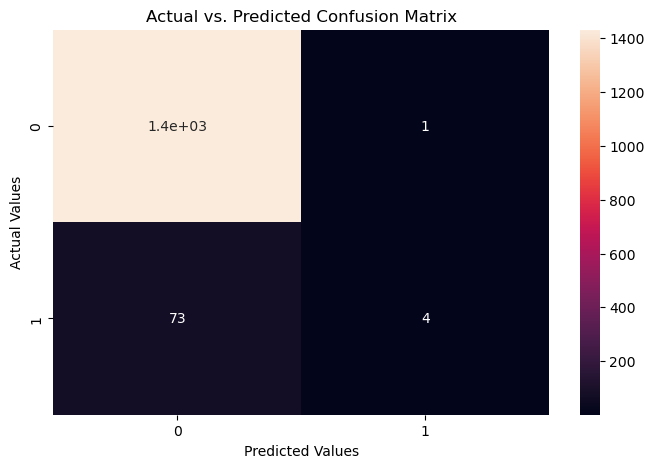

In [170]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, ax=ax)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [171]:
error = 1 - accuracy
print(f'Error: {error}')

Error: 0.0490066225165563


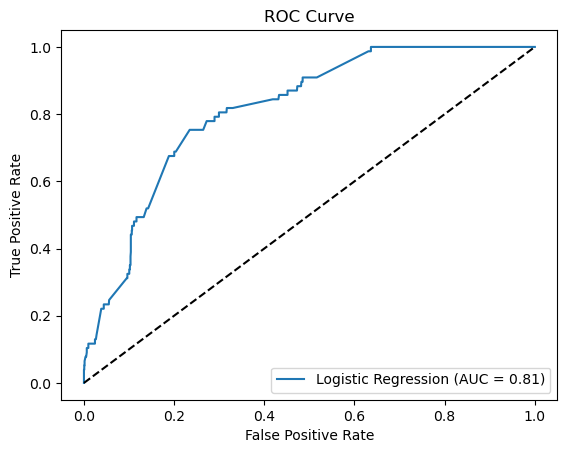

In [172]:
y_pred_prob = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### RandomForest Algorithm

In [173]:
randfor = RandomForestClassifier()

randfor.fit(x_train, y_train)
    
y_pred = randfor.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.04%


### DecisionTree

In [174]:
# Decision Tree
dt = DecisionTreeClassifier(random_state = 1,max_depth = 2)
dt.fit(x_train, y_train)
dt_train = dt.score(x_train,y_train)
dt_test = dt.score(x_test,y_test)

#y_pred_dt = dt.predict(x_test)

print('Training Score',dt_train)

print('Testing Score',dt_test)

Training Score 0.9571192052980132
Testing Score 0.9490066225165563


In [175]:
# Decision Tree
dt = DecisionTreeClassifier(random_state = 1,max_depth = 4)
dt.fit(x_train, y_train)
dt_train = dt.score(x_train,y_train)
dt_test = dt.score(x_test,y_test)

#y_pred_dt = dt.predict(x_test)

print('Training Score',dt_train)

print('Testing Score',dt_test)

Training Score 0.9576158940397351
Testing Score 0.9509933774834437


In [176]:
# Decision Tree
dt = DecisionTreeClassifier(random_state = 1,max_depth = 6)
dt.fit(x_train, y_train)
dt_train = dt.score(x_train,y_train)
dt_test = dt.score(x_test,y_test)

#y_pred_dt = dt.predict(x_test)

print('Training Score',dt_train)

print('Testing Score',dt_test)

Training Score 0.9592715231788079
Testing Score 0.9490066225165563


In [177]:
# Decision Tree - overfitting
dt = DecisionTreeClassifier(random_state = 1,max_depth = 8)
dt.fit(x_train, y_train)
dt_train = dt.score(x_train,y_train)
dt_test = dt.score(x_test,y_test)

#y_pred_dt = dt.predict(x_test)

print('Training Score',dt_train)

print('Testing Score',dt_test)

Training Score 0.9610927152317881
Testing Score 0.9496688741721855


#### Observation: Based on these results, max_depth = 4 appears to be a good compromise for achieving high performance on both training and testing data. 

In [178]:
# Decision Tree using Entropy
ent = DecisionTreeClassifier(max_depth = 4,criterion = 'entropy')

ent.fit(x_train,y_train)

ent_train = ent.score(x_train,y_train)
print(f'Training score: {ent_train}')

ent_test = ent.score(x_test,y_test)
print(f'Testing score: {ent_test}')

Training score: 0.9576158940397351
Testing score: 0.9509933774834437


### Naive Bayes Classifier

In [179]:
model = GaussianNB()

# Train the model
model.fit(x_train, y_train)

# Predict the results
pred = model.predict(x_test)
mat = confusion_matrix(y_test, pred)
names = np.unique(pred)
print(mat)

class_report = classification_report(y_test, pred)
print(f'Classification Report:\n{class_report}')

[[1386   47]
 [  68    9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1433
           1       0.16      0.12      0.14        77

    accuracy                           0.92      1510
   macro avg       0.56      0.54      0.55      1510
weighted avg       0.91      0.92      0.92      1510



### KNN Algorithm

In [180]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(x_train,y_train)

pred1 = knn.predict(x_test)

print(confusion_matrix(y_test,pred1))

print(classification_report(y_test,pred1))

[[1424    9]
 [  72    5]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1433
           1       0.36      0.06      0.11        77

    accuracy                           0.95      1510
   macro avg       0.65      0.53      0.54      1510
weighted avg       0.92      0.95      0.93      1510



### Gradient Booster - XgBoost

In [181]:
gbm = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gbm.fit(x_train, y_train)

# Make predictions
y_pred = gbm.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, gbm.predict_proba(x_test)[:, 1])

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
print(f'ROC AUC: {roc_auc:.4f}')

Accuracy: 0.9503
Confusion Matrix:
[[1432    1]
 [  74    3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1433
           1       0.75      0.04      0.07        77

    accuracy                           0.95      1510
   macro avg       0.85      0.52      0.52      1510
weighted avg       0.94      0.95      0.93      1510

ROC AUC: 0.8332


#### Observation: 

  - Logistic Regression (Accuracy: 95.09%, ROC-AUC: 0.81)
  - KNN (Accuracy: 95.03%)
  - Random Forest (Accuracy: 94.17%)

#### These three models have similar performance, with Logistic Regression slightly edging out the other two. 
#### Decision Tree (max_depth = 4) has similar performance to Random Forest but its entropy scores are slightly lower.
#### XgBoosting algorithm -  Better performance on class 0 but poor recall for class 1

### Overall Comparison

  - Best performer: Model 1 (Logistic Regression, Accuracy: 99.69%, ROC-AUC: 0.99)
  - Good quality models: Model 2 (Random Forest, Accuracy: 95.67%), Model 3 (Logistic Regression, Accuracy: 95.09%, ROC-AUC: 0.81)

### Final Conclusion
   *  Based on the performance metrics, Model 1 (travel_type_id = 1) with Logistic Regression is the best-performing model, achieving an accuracy of 99.69% and ROC-AUC of 0.99. This model is well-suited for predicting car cancellations for travel_type_id = 1.
   *  Model 2 (travel_type_id = 2) with Random Forest and Model 3 (travel_type_id = 3) with Logistic Regression are good quality models, achieving high accuracy scores. However, they are slightly less performant than Model 1. Model 2 is a strong alternative, while Model 3, despite good overall accuracy, is less effective for class 1 predictions.

In [182]:
# pip install geopy